Alexander Bae<br>
DATA 71200: Advanced Data Analysis<br>
Prof. Johanna Devaney<br>
2021-06-12<br>

<b>Dataset</b>: [UCI Machine Learning Repository Abalone Dataset](https://archive.ics.uci.edu/ml/datasets/Abalone)

In [94]:
import requests
import pandas as pd
import matplotlib as mpl
import mglearn as mgl
import numpy as np
from sklearn.model_selection import train_test_split as split

# Obtain load the dataset from the UCI Repository archives
uci_link = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")

# UCI dataset does not automatically provide headers; manually provide a list of headers for data
abalone_colnames = ['sex', 'shell_length', 'diameter', 'height', 'total_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'] 

# create dataframe using the link data, and the list of column names
abalone_df = pd.read_csv(uci_link, names = abalone_colnames)

In [51]:
# check data types and column names of the data frame
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   shell_length    4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   total_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<h1>Data Cleaning and Preparation</h1>

In [48]:
# use the .isnull() and .sum() functions to assess whether any columns have a null value that need to be addressed
# since no values are null, no imputation or dropping of rows need to be done
abalone_df.isnull().sum()

sex               0
shell_length      0
diameter          0
height            0
total_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [50]:
abalone_df['sex'].unique()

array(['M', 'F', 'I'], dtype=object)

None of the columns require any dropping of duplicated values, and all values in the 'sex' column are uniform per distinct value, so no further edits need to be made, and test/training sets can be created at this point.

<h1>Creating Test and Training Sets</h1>

In [38]:
# given input column of the number of rings (age), can we train the model to predict the size of the abalone shell?
# random_state set to 42 because it is the answer to life
X_train, X_test, y_train, y_test = split(
    abalone_df['rings'], abalone_df['shell_length'], random_state=42)

In [39]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (3132,)
y_train shape: (3132,)


In [40]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (1045,)
y_test shape: (1045,)


<h1>Exploring the training sets</h1>

In [41]:
# create data frame from the X_train set
abalone_input_training = pd.DataFrame(X_train)
abalone_output_training = pd.DataFrame(y_train)

In [42]:
# display the information about the training data frame
abalone_input_training.info()
abalone_output_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3132 entries, 3823 to 860
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rings   3132 non-null   int64
dtypes: int64(1)
memory usage: 48.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3132 entries, 3823 to 860
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   shell_length  3132 non-null   float64
dtypes: float64(1)
memory usage: 48.9 KB


In [43]:
abalone_input_training.head()

,rings
3823,9
3956,12
3623,10
0,15
2183,6


In [44]:
abalone_output_training.head()

,shell_length
3823,0.615
3956,0.515
3623,0.660
0,0.455
2183,0.495


In [45]:
# summary statistics for input training set
abalone_input_training.describe()

,rings
count,3132.000000
mean,9.964879
std,3.229146
min,1.000000
25%,8.000000
50%,10.000000
75%,11.000000
max,29.000000


In [46]:
# summary statistics for output training set
abalone_output_training.describe()

,shell_length
count,3132.000000
mean,0.525750
std,0.119131
min,0.075000
25%,0.450000
50%,0.545000
75%,0.615000
max,0.815000


<h1>Visualizing Data</h1>

array([[<AxesSubplot:title={'center':'rings'}>]], dtype=object)

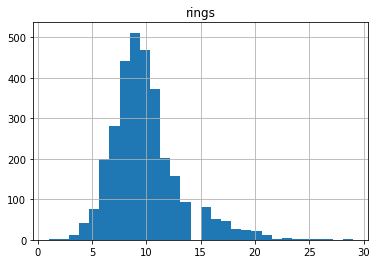

In [59]:
abalone_input_training.hist(bins=30)

In the histogram above, we see that there is a right skew in the number of rings on each abalone.  Each bin indicates the number of rings on the abalone shell.  Because the number of rings indicates the age of the abalone, we see that many of the abalone in the dataset are younger in age.  Dropping the older outliers in order to normalize the data may be a factor to take into consideration.

array([[<AxesSubplot:title={'center':'shell_length'}>]], dtype=object)

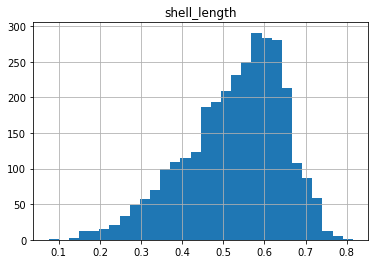

In [62]:
abalone_output_training.hist(bins=30)

In the histogram above detailing the shell_length of the abalone, we see an opposite effect in that there is a left skew.  We see that the length of the shells increase.  This would imply that there is a positive correlation with the number of rings; that is to say, that the older an abalone gets (increased number of rings), the bigger the shell length.  

In [88]:
# join the input training and output training columns together for the scatter matrix
abalone_training = abalone_input_training.join(abalone_output_training)

,rings,shell_length
3823,9,0.615
3956,12,0.515
3623,10,0.660
0,15,0.455
2183,6,0.495
...,...,...
3444,9,0.490
466,12,0.670
3092,11,0.510
3772,9,0.575


array([[<AxesSubplot:xlabel='rings', ylabel='rings'>,
        <AxesSubplot:xlabel='shell_length', ylabel='rings'>],
       [<AxesSubplot:xlabel='rings', ylabel='shell_length'>,
        <AxesSubplot:xlabel='shell_length', ylabel='shell_length'>]],
      dtype=object)

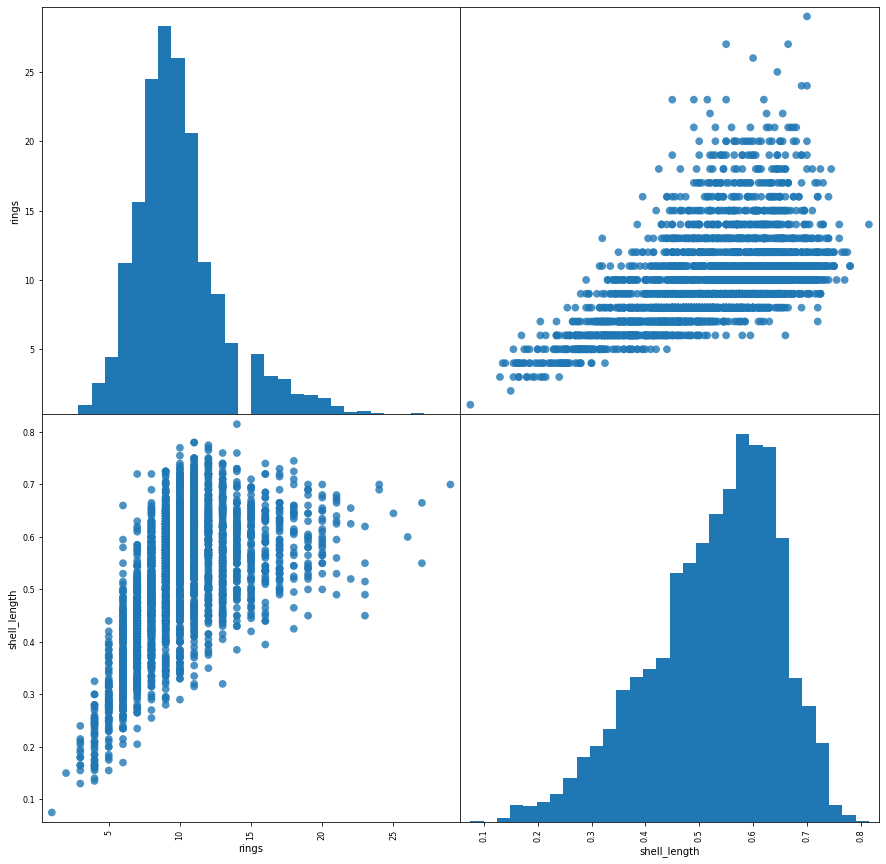

In [90]:
pd.plotting.scatter_matrix(abalone_training, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 30}, s=60,
                           alpha=.8, cmap=mgl.cm3)

<h1>Data transformation</h1>

array([[<AxesSubplot:title={'center':'rings'}>,
        <AxesSubplot:title={'center':'shell_length'}>]], dtype=object)

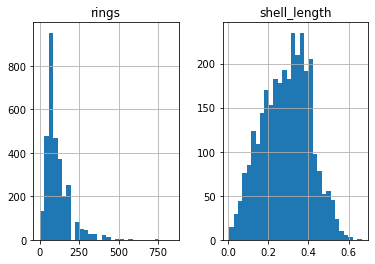

In [100]:
# squaring
abalone_sq = abalone_training**2
abalone_sq.hist(bins=30)

array([[<AxesSubplot:xlabel='rings', ylabel='rings'>,
        <AxesSubplot:xlabel='shell_length', ylabel='rings'>],
       [<AxesSubplot:xlabel='rings', ylabel='shell_length'>,
        <AxesSubplot:xlabel='shell_length', ylabel='shell_length'>]],
      dtype=object)

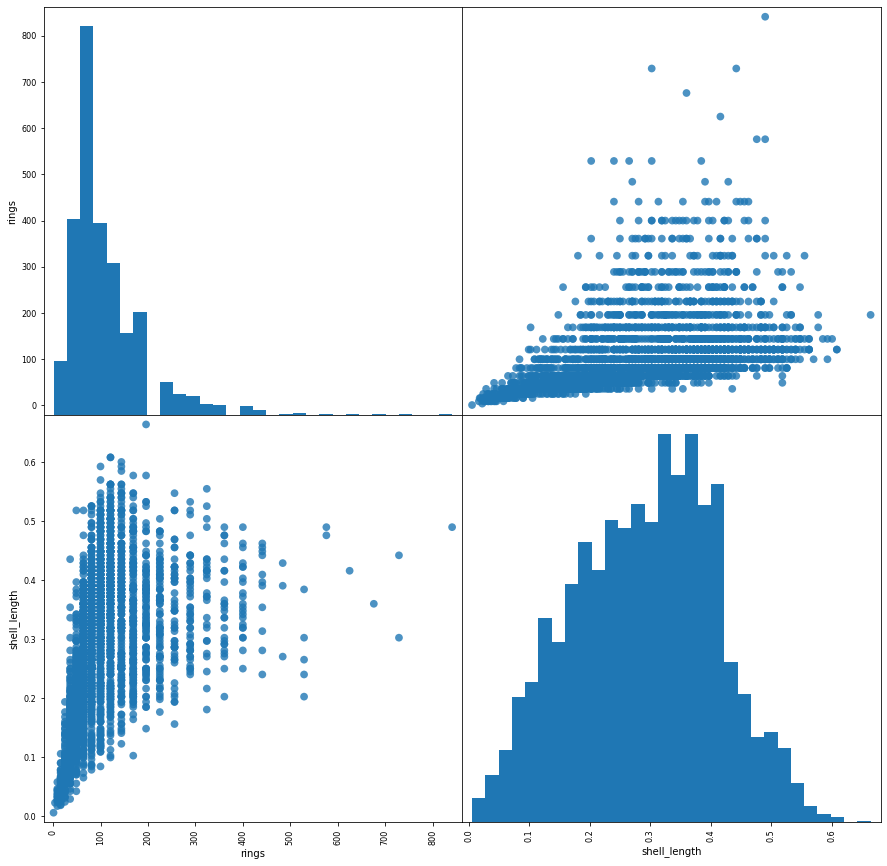

In [101]:
# abalone_sq scatter matrix
pd.plotting.scatter_matrix(abalone_sq, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 30}, s=60,
                           alpha=.8, cmap=mgl.cm3)

array([[<AxesSubplot:title={'center':'rings'}>,
        <AxesSubplot:title={'center':'shell_length'}>]], dtype=object)

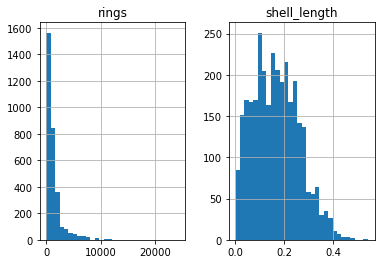

In [102]:
# cubing
abalone_cube = abalone_training**3
abalone_cube.hist(bins=30)

array([[<AxesSubplot:xlabel='rings', ylabel='rings'>,
        <AxesSubplot:xlabel='shell_length', ylabel='rings'>],
       [<AxesSubplot:xlabel='rings', ylabel='shell_length'>,
        <AxesSubplot:xlabel='shell_length', ylabel='shell_length'>]],
      dtype=object)

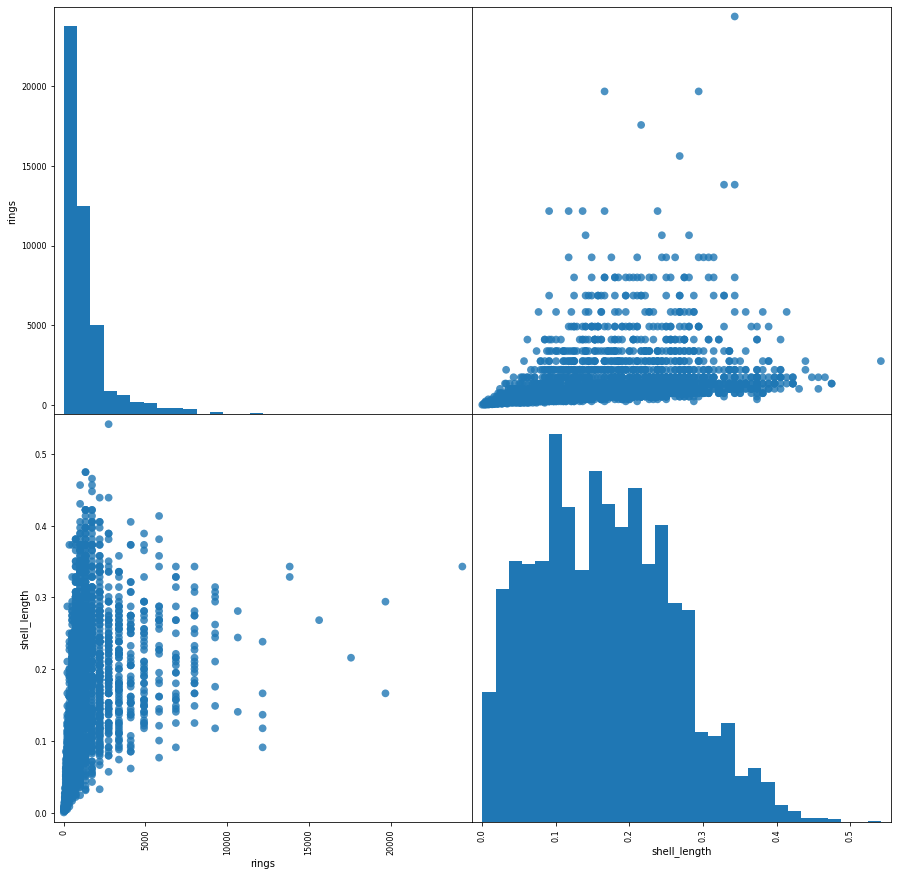

In [103]:
pd.plotting.scatter_matrix(abalone_cube, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 30}, s=60,
                           alpha=.8, cmap=mgl.cm3)

array([[<AxesSubplot:title={'center':'rings'}>,
        <AxesSubplot:title={'center':'shell_length'}>]], dtype=object)

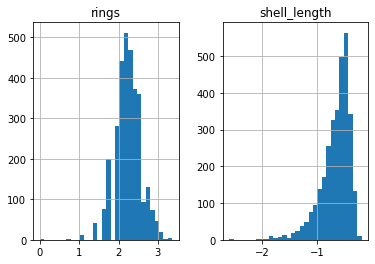

In [105]:
# log
abalone_log = np.log(abalone_training)
abalone_log.hist(bins=30)

array([[<AxesSubplot:xlabel='rings', ylabel='rings'>,
        <AxesSubplot:xlabel='shell_length', ylabel='rings'>],
       [<AxesSubplot:xlabel='rings', ylabel='shell_length'>,
        <AxesSubplot:xlabel='shell_length', ylabel='shell_length'>]],
      dtype=object)

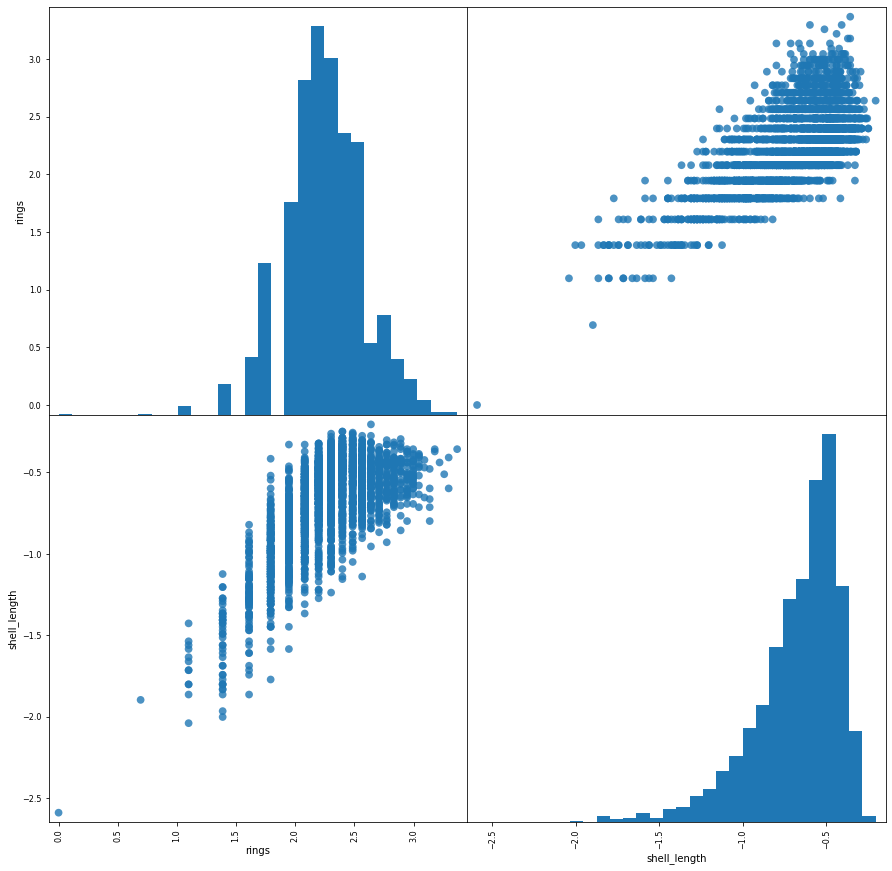

In [106]:
pd.plotting.scatter_matrix(shell_length_log, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 30}, s=60,
                           alpha=.8, cmap=mgl.cm3)

array([[<AxesSubplot:title={'center':'rings'}>,
        <AxesSubplot:title={'center':'shell_length'}>]], dtype=object)

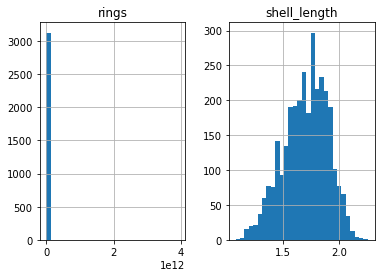

In [107]:
# exp
abalone_exp = np.exp(abalone_training)
abalone_exp.hist(bins=30)

array([[<AxesSubplot:xlabel='rings', ylabel='rings'>,
        <AxesSubplot:xlabel='shell_length', ylabel='rings'>],
       [<AxesSubplot:xlabel='rings', ylabel='shell_length'>,
        <AxesSubplot:xlabel='shell_length', ylabel='shell_length'>]],
      dtype=object)

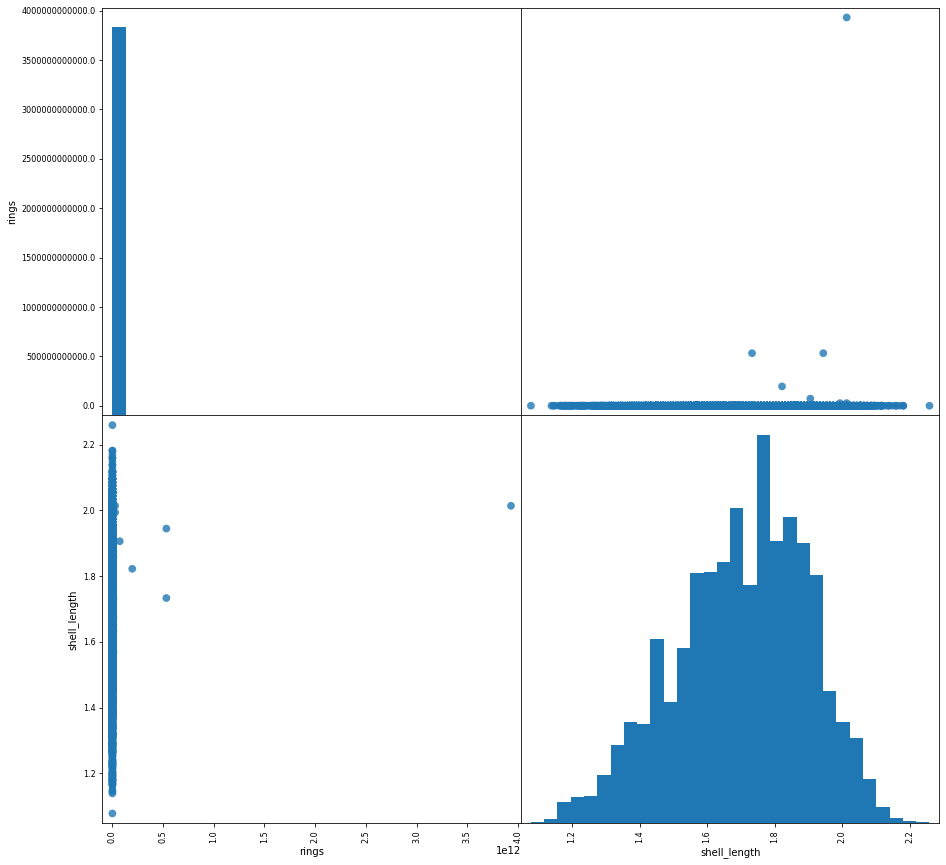

In [108]:
pd.plotting.scatter_matrix(abalone_exp, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 30}, s=60,
                           alpha=.8, cmap=mgl.cm3)